#### Lab 5 - Using link functions to create generalized linear models

##### Import data from file

In [36]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('Airline_data.csv')
print(data)

   Year  Fatal accidents  Passenger deaths  Miles flown [100 mln miles]
0  1976               24               734                       3863.0
1  1977               25               516                       4300.0
2  1978               31               754                       5027.0
3  1979               31               877                       5481.0
4  1980               22               814                       5814.0
5  1981               21               362                       6033.0
6  1982               26               764                       5877.0
7  1983               20               809                       6223.0
8  1984               16               223                       7433.0
9  1985               22              1066                       7107.0


## 1. Create model; prior

In [8]:
model_ppc=CmdStanModel(stan_file='lab5_1.stan', compile=True)



R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)
sim = sim.draws_pd()
sim

INFO:cmdstanpy:compiling stan file /home/lab5/lab5_1.stan to exe file /home/lab5/lab5_1
INFO:cmdstanpy:compiled model executable: /home/lab5/lab5_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,alpha,theta,y
0,0.0,0.0,7708.17,0.000228,0.000473,36.0
1,0.0,0.0,4166.11,0.000390,0.000430,3.0
2,0.0,0.0,5743.49,0.000216,0.000623,47.0
3,0.0,0.0,4008.71,0.000331,0.000472,7.0
4,0.0,0.0,5219.64,0.000307,0.000584,15.0
...,...,...,...,...,...,...
995,0.0,0.0,6244.37,0.000080,0.000540,27.0
996,0.0,0.0,3848.24,0.000054,0.000378,7.0
997,0.0,0.0,5762.65,0.000324,0.000545,26.0
998,0.0,0.0,6632.47,0.000199,0.000449,28.0


#### Input values are mostly similar to th data in csv. The hardest thing was to pick correct alpha and beta values because at firt as the return wre only zeros

Text(0.5, 1.0, 'y - number of accidents')

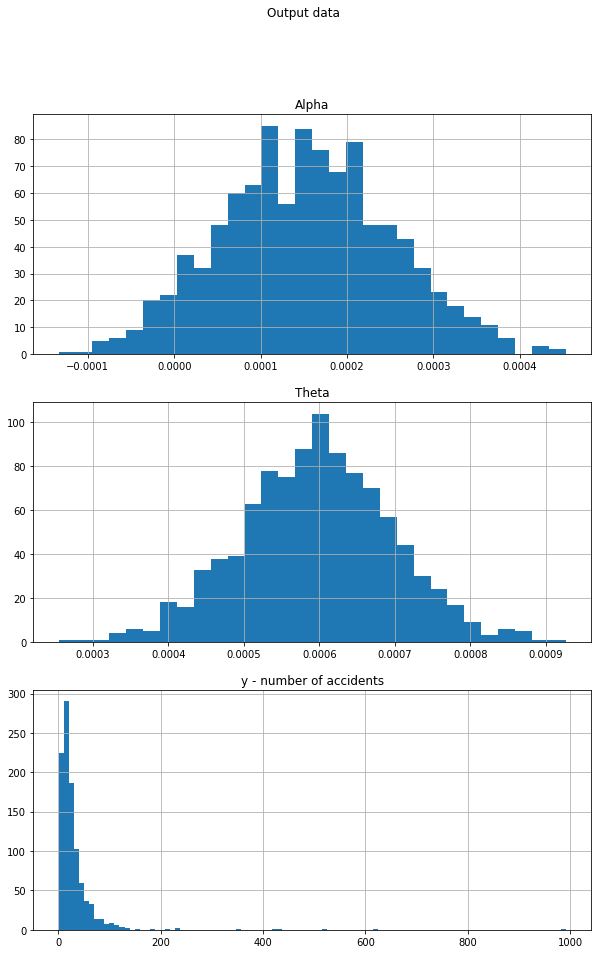

In [10]:
fig, axs = plt.subplots(3, figsize=(10, 15))
fig.suptitle('Output data')
axs[0].hist(sim['alpha'], bins = 30)
axs[1].hist(sim['theta'], bins = 30)
axs[2].hist(sim['y'], bins = 100)
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].set_title("Alpha")
axs[1].set_title("Theta")
axs[2].set_title("y - number of accidents")

## 2. Fitting model to data; posterior

#### Data needed to be normalized because the previous parameters werent good for fitiing model to data

In [37]:
data['Miles flown [100 mln miles]'] /= 1000
data['Miles flown [100 mln miles]'] = data['Miles flown [100 mln miles]'] - data['Miles flown [100 mln miles]'].mean()
data

,Year,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
0,1976,24,734,-1.8528
1,1977,25,516,-1.4158
2,1978,31,754,-0.6888
3,1979,31,877,-0.2348
4,1980,22,814,0.0982
5,1981,21,362,0.3172
6,1982,26,764,0.1612
7,1983,20,809,0.5072
8,1984,16,223,1.7172
9,1985,22,1066,1.3912


#### Changes to parameters in model

In [46]:
model_ppc=CmdStanModel(stan_file='lab5_1_1.stan', compile=True)

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)
sim = sim.draws_pd()
sim

INFO:cmdstanpy:compiling stan file /home/lab5/lab5_1_1.stan to exe file /home/lab5/lab5_1_1
INFO:cmdstanpy:compiled model executable: /home/lab5/lab5_1_1
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,N,alpha,theta,y
0,0.0,0.0,2.708170,3.27772,0.072773,30.0
1,0.0,0.0,-0.833885,3.43984,0.029516,26.0
2,0.0,0.0,0.743487,3.26560,0.223010,36.0
3,0.0,0.0,-0.991294,3.38121,0.071969,29.0
4,0.0,0.0,0.219635,3.35748,0.183823,33.0
...,...,...,...,...,...,...
995,0.0,0.0,-2.386850,3.21039,0.221942,16.0
996,0.0,0.0,-0.685624,3.34868,0.235204,17.0
997,0.0,0.0,-1.119040,3.22172,0.159248,20.0
998,0.0,0.0,1.028340,3.28759,0.228523,36.0


In [48]:
model_1_fit=CmdStanModel(stan_file='lab5_2.stan')
fit = model_1_fit.sample(data={"N": data.shape[0], "n_i": data["Miles flown [100 mln miles]"].values, "accidents": data["Fatal accidents"].values})

df3 = fit.draws_pd()

INFO:cmdstanpy:compiling stan file /home/lab5/lab5_2.stan to exe file /home/lab5/lab5_2
INFO:cmdstanpy:compiled model executable: /home/lab5/lab5_2
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/lab5_2.hpp /home/lab5/lab5_2.stan
Warning in '/home/lab5/lab5_2.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/lab5_2.stan', line 4, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/lab5_2.stan', line 20, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
   


INFO:cmdstanpy:CmdStan done processing.


0       22.0
1       18.0
2       20.0
3       25.0
4       27.0
        ... 
3995    32.0
3996    27.0
3997    21.0
3998    20.0
3999    23.0
Name: accidents_sample[2], Length: 4000, dtype: float64

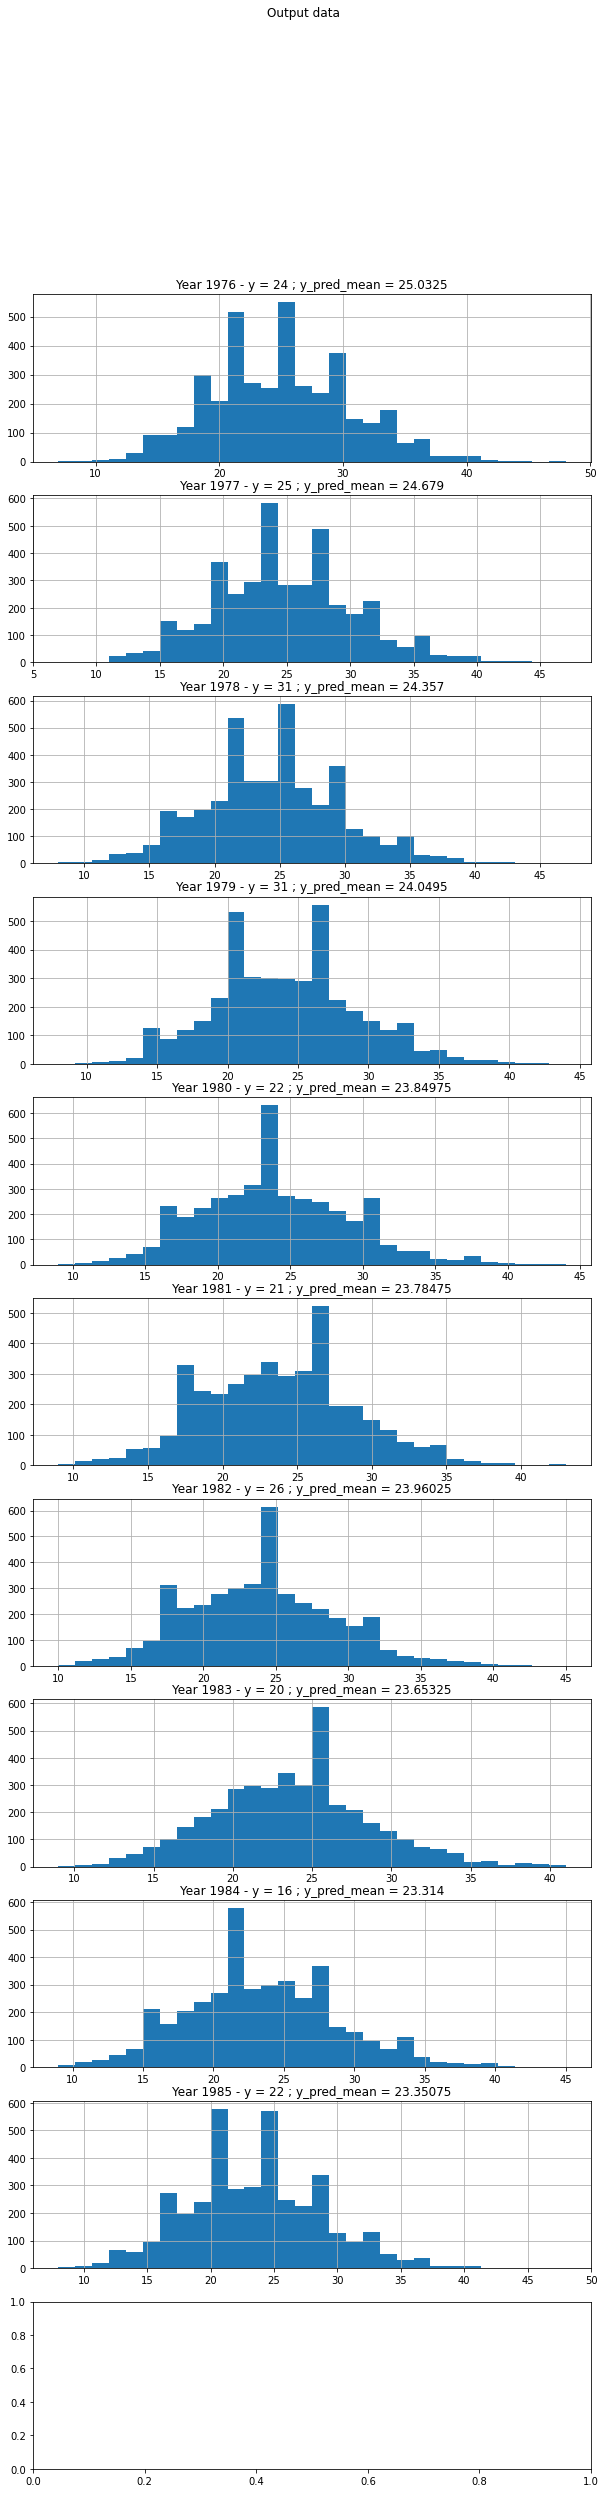

In [55]:
fig, axs = plt.subplots(11, figsize=(10, 40))
fig.suptitle('Output data')
year = 1976
for i in range(1,11):
    axs[i-1].hist(df3[f'accidents_sample[{i}]'], bins = 30)
    axs[i-1].grid()
    axs[i-1].set_title(f"Year {year} - y = {data['Fatal accidents'][i-1]} ; y_pred_mean = {df3[f'accidents_sample[{i}]'].mean()}")
    year += 1
    

## 3. Improving model

In [59]:
model_1_fit=CmdStanModel(stan_file='lab5_3.stan')
fit = model_1_fit.sample(data={"N": data.shape[0], "n_i": data["Miles flown [100 mln miles]"].values, "accidents": data["Fatal accidents"].values})

df3 = fit.draws_pd()

INFO:cmdstanpy:compiling stan file /home/lab5/lab5_3.stan to exe file /home/lab5/lab5_3
INFO:cmdstanpy:compiled model executable: /home/lab5/lab5_3
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/lab5/lab5_3.hpp /home/lab5/lab5_3.stan
Warning in '/home/lab5/lab5_3.stan', line 3, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/lab5_3.stan', line 4, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
    removed in Stan 2.32.0. Instead use the array keyword before the type.
    This can be changed automatically using the auto-format flag to stanc
Warning in '/home/lab5/lab5_3.stan', line 20, column 4: Declaration of arrays
    by placing brackets after a variable name is deprecated and will be
   


INFO:cmdstanpy:CmdStan done processing.


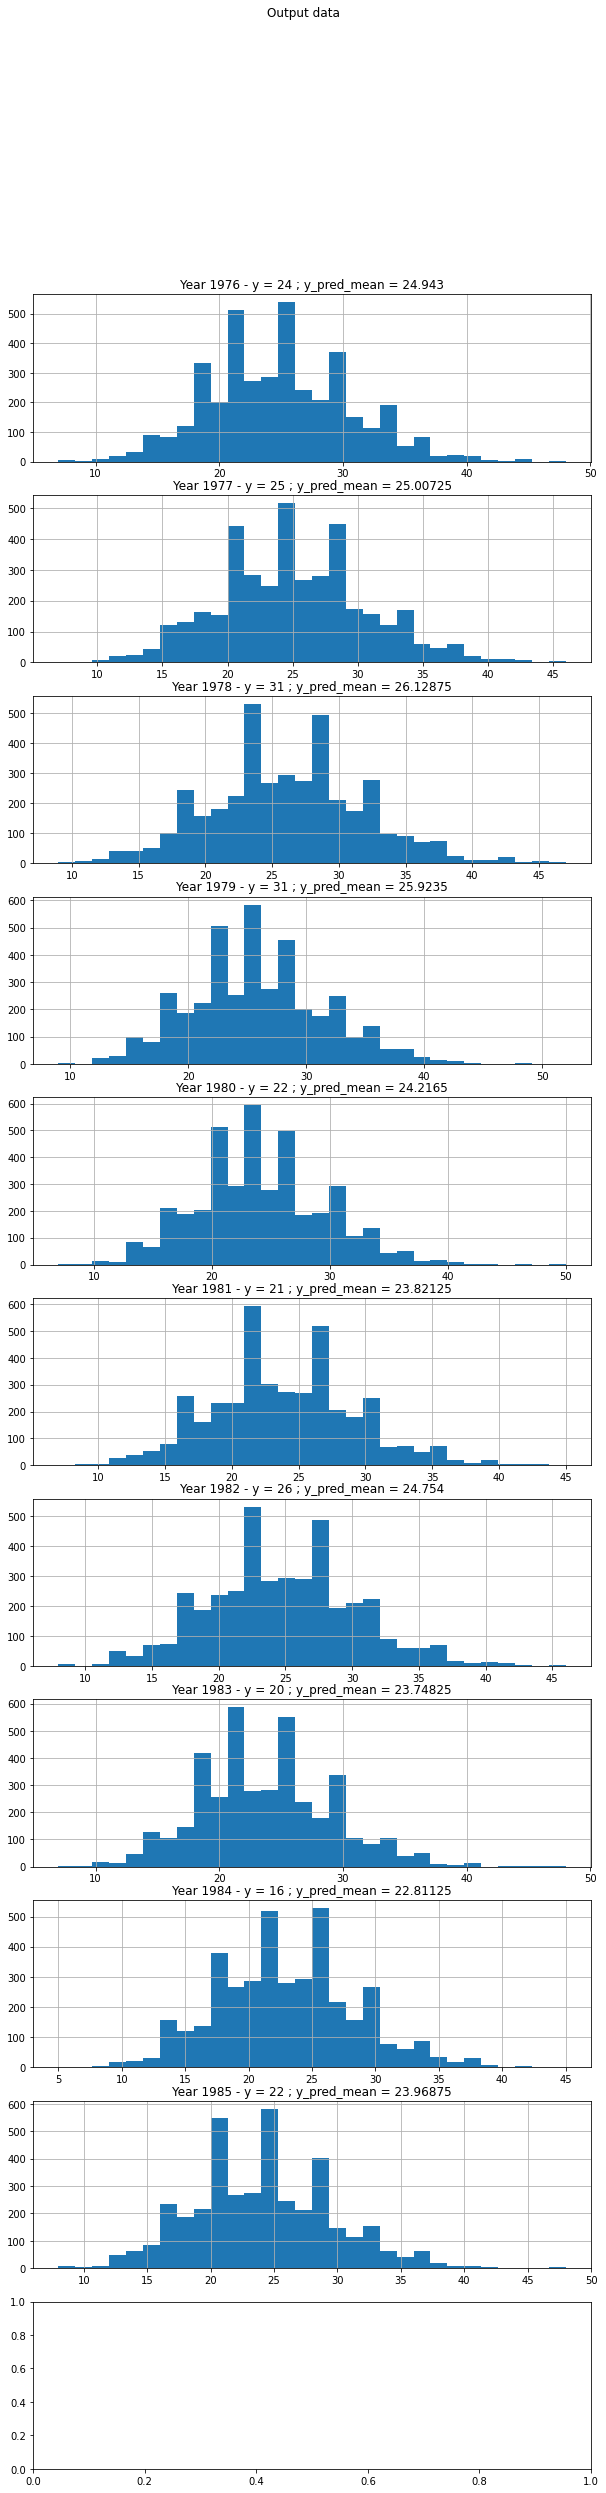

In [60]:
fig, axs = plt.subplots(11, figsize=(10, 40))
fig.suptitle('Output data')
year = 1976
for i in range(1,11):
    axs[i-1].hist(df3[f'accidents_sample[{i}]'], bins = 30)
    axs[i-1].grid()
    axs[i-1].set_title(f"Year {year} - y = {data['Fatal accidents'][i-1]} ; y_pred_mean = {df3[f'accidents_sample[{i}]'].mean()}")
    year += 1
    

#### The output now is sligtly better then with previous fitting  